<a href="https://colab.research.google.com/github/RohitJangid9983/Road-Accident/blob/main/road_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***ROAD ACCIDENT DATASET***

# ***⭐Install Librarys***

In [ ]:
!pip install summarytools

# ***⭐Import All Libraries***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import summarytools as st
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.feature_selection import RFE
import xgboost as XGBoost
import warnings
warnings.filterwarnings('ignore')

## ***⚡Upload dataset***

In [ ]:
df = pd.read_csv("/content/accident.csv")

In [ ]:
# check the top 5 values
df.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


In [ ]:
# check the tail 5 values
df.tail()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
195,69,Female,111.0,No,Yes,1
196,30,Female,51.0,No,Yes,1
197,58,Male,110.0,No,Yes,1
198,20,Male,103.0,No,Yes,1
199,56,Female,43.0,No,Yes,1


## ***⚡Number of rows and columns***

In [ ]:
df.shape

(200, 6)

In [ ]:
# Show The Columns Name
df.columns

Index(['Age', 'Gender', 'Speed_of_Impact', 'Helmet_Used', 'Seatbelt_Used',
       'Survived'],
      dtype='object')

## ***⚡Overview The Data***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   Gender           199 non-null    object 
 2   Speed_of_Impact  197 non-null    float64
 3   Helmet_Used      200 non-null    object 
 4   Seatbelt_Used    200 non-null    object 
 5   Survived         200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


## ***⚡Data Frame Summary***

In [ ]:
st.dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Age[int64],Mean (sd) : 43.4 (14.9)min < med < max:18.0 < 43.5 < 69.0IQR (CV) : 25.0 (2.9),51 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAplJREFUeJzt3D2O2kAAhuEZWJD5kS2EAh1NykgpKDlEDpsjpOAEFGlS0SEhBMJZhDFOsxSR0C6ewct85n36wZbmlZmxMbYoCgOErvHoEwBu8fLoEwiVtbZjjGk7Dj8WRfF6z/N5doR6hbW2MxwOf8RxPHAZv9vtNtban8R6P4R6XTuO48FsNntNkuRQZuB2u43m8/lgvV63jTGEeieE+o4kSQ6j0eivw9DO3U/mybGZggRChQRChQRChYQPN1PcT0QI3g2V+4kIxUdXVO4nIgg33Ud1vZ+Y53lsjImttaVP7A1Lh5I8l2oNY8zZ4/CVzVdlN/zTNG1lWfZ9Mpk0m81mqavxBUuHcnyWanmet9I0/drv9/80Go3M5fhVzldloR6Px5coirrT6fQwHo83ZcezdHDivFRbLpeDxWLxZTqd/g5xvip/hNrr9VwfQ/ouHZ522eCyVNtsNh1jwp2vYJ/1+y4dWDZ8rqrnK9hQfZYOj1425HneMu5XFp8NTXw+n1uOY71UPV/Bhnrh8VX0kF8w+VxZfDc0WZZFeZ5/OxwOv4wxTl/fvqqar+BDVeNzZfHd0LyN755Op2bZsaEj1Iq4XFl8NzSX8XXEj1IggVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhoba/R/V8HeRhr3TgulqG6vuiWQivdOB/tQzV9z8F6vxKh6pahnrBKx31wWYKEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEm76k7TtdhuV/eD9fh8ZY0yaptFqtep+5njVY6uet+/4W/r6B/EpqqCQJHYfAAAAAElFTkSuQmCC"">",0(0.0%)
2,Gender[object],1. Female2. Male3. nan,110 (55.0%)89 (44.5%)1 (0.5%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAZpJREFUeJzt20Fq22AUhdGnIEIzkTACL8aLyGK7CO3GGGuQhEyUQVNogzLrf2Xcc1bwMB+2ZXy7dV0LEh72PoD/R1dVT1X1uPchd+Z9XdfXvY+4Nf00Tc/DMBz2PuSeLMty6brup+D+1g/DcDidTq/jOL7tfcw9uF6vP+Z5PpzP58eqEtsf+qqqcRzfjsfjy97H3JGnvQ+4RR4QiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsRHTV/36D9beh9wLr+X3+mVZLvM8H8p/sP6ZZVkuVfW+9x23xgahDRuEDZ0pHyne2bZ5Z2rAumqDdVQb1lVfWEe1Y121zZN5A37UJUZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaMddUXXot2rKs2WEe1YYOwzQahAesqYjwgEPP7Y7R8bNBaP03Tc1WV6RqtPQzDcPjcjXpIoCnf2YgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEZM/zlbqzJdozEbBGJM+Yj5ABDSg2z4+PvBAAAAAElFTkSuQmCC"">",1(0.5%)
3,Speed_of_Impact[float64],Mean (sd) : 70.4 (30.1)min < med < max:20.0 < 71.0 < 119.0IQR (CV) : 52.0 (2.3),80 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAApdJREFUeJzt2z+O2kAUgPE3YUEGJCOEBB0XiJSCkkPksDlCCk7ADeiQEDLCuxbGOFUiil3+eJjw3vD9WuTdKT6B/cbj6roWQLtvz14AcIu3Zy8A8XDOdUWk0/DyQ13XH199SKh4COdcdzQa/UzTdNjk+t1ut3XO/foqVkLFo3TSNB3O5/OPwWBQ3HNhlmXJYrEYbjabjogQKsIbDAbFeDx+b3Bp99KHPEzBBEKFCYQKEwgVJhAqTOCpXxnPobnIlcG5VYSqiO/QXOT64NwqQtWl8dBc5LbBuVWEqpDH0FzkyuDcKh6mYAKhwgTVP/0hXxsLyWPd6el0aj96PTFQG2ro18ZC8Vl3WZZJVVXfi6L4LSJN71GjpDZUCfzaWECN171arYbL5bJ3PB5boRZnleZQRSTca2OhNVn3druN8on9EXiYggmEChMIFSYEvUf1HC8xqsE/wUL1HS8xqsG5kN+oXi9YMKrBueDjqabjJUY1OHc1VLYDocHFUNkOhBbXvlHZDoQKN92jsh2IZ2PgDxMIFSYQKkxQ/5rfs7ziWE7zljehfuIVx3Lat7wJ9XOvOJZTveVNqBe84lhO65Z3tKFWVdUWkdQ51+Rys/eZsYoy1DzP22VZ/phOp61Wq3X3z5jV+8yYRRnq4XB4S5KkN5vNislksr33esP3mdGKMtS/+v2+yvst3I+BP0wgVJhAqDCBUGECocIEQoUJhAoTCBUmECpMIFSYQKgwgVBhAqHCBEKFCYQKE6J+H/UVeRzBUX38hlAj4nMER/vxG0KNiM8RHO3Hbwg1Qk2O4Gg/fsPDFEwgVJhAqDCBUGECocIEQoUJhAoTbpqjZlmW3PuH9/t9IiKS53myXq97//N6q//b6rp9r7+lrz+RRp8touHbPgAAAABJRU5ErkJggg=="">",3(1.5%)
4,Helmet_Used[object],1. Yes2. No,111 (55.5%)89 (44.5%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAATpJREFUeJzt20FqwzAURdGvIkIzkTAGL8aL6GK7CO3GGGvQhEyUQQoFo2H0ZNx7VvAxF0OCnyulGKDgzOxqZpfeh5zQo5Ry633EkfhxHL9CCEPvQ84m57w6574J7o8PIQzzPN9ijPfex5zFtm2fKaVhWZaLmRHbL29mFmO8T9P00/uYk7n2PuBoPnofgP+D2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGW/2+tiv9yFnwvOs8znnNaU0GB/7vVXOeTWzR+87joTBSzsMXnYcUz6o8Gar463U

In [ ]:
#describe --> statistical measures of the data
df.describe(exclude = 'object').style.background_gradient(cmap='BuPu')

,Age,Speed_of_Impact,Survived
count,200.000000,197.000000,200.000000
mean,43.425000,70.441624,0.505000
std,14.941910,30.125298,0.501230
min,18.000000,20.000000,0.000000
25%,31.000000,43.000000,0.000000
50%,43.500000,71.000000,1.000000
75%,56.000000,95.000000,1.000000
max,69.000000,119.000000,1.000000


## ***⚡Data Cleaning Step***

In [ ]:
# check the missing values and sum
df.isnull().sum()

,0
Age,0
Gender,1
Speed_of_Impact,3
Helmet_Used,0
Seatbelt_Used,0
Survived,0


In [ ]:
# check the duplicate values
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
195,False
196,False
197,False
198,False


In [ ]:
# check the duplicate values and sum
df.duplicated().sum()

np.int64(0)

In [ ]:
# check Gender in Female and Male
df["Gender"].value_counts()

,count
Gender,
Female,110
Male,89


In [ ]:
# check unique values in gender columns
df ["Gender"].unique()

array(['Female', 'Male', nan], dtype=object)

In [ ]:
# Data processing and user input clean data
df.columns = df.columns.str.strip()

# ***⭐Data visualization Steps***

## ***⚡Histogram plot show***

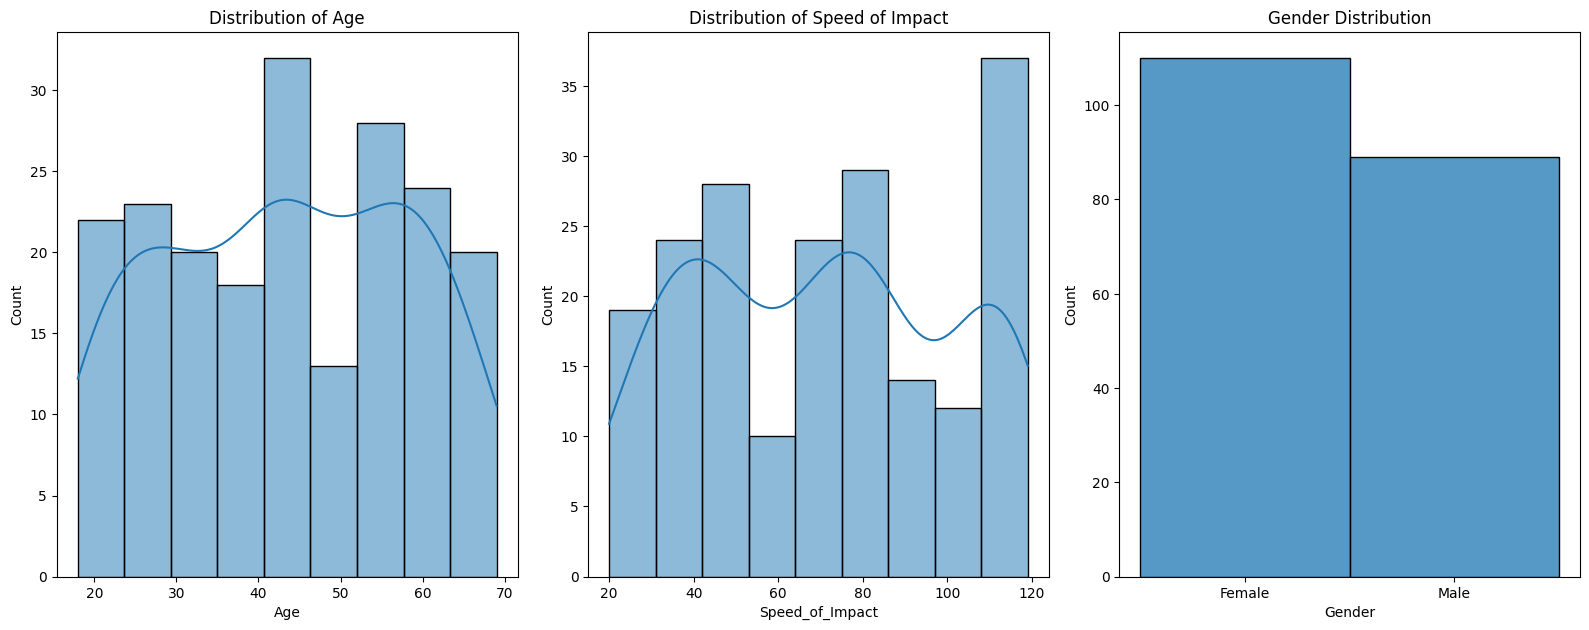

In [ ]:
# Create visualizations of key variables
plt.figure(figsize=(16, 12))

# Distribution of Age
plt.subplot(2, 3, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')

# Distribution of Speed of Impact
plt.subplot(2, 3, 2)
sns.histplot(df['Speed_of_Impact'], kde=True)
plt.title('Distribution of Speed of Impact')

# Distribution of Gender
plt.subplot(2, 3, 3)
sns.histplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.tight_layout()
plt.show()

## ***⚡Count plot show***

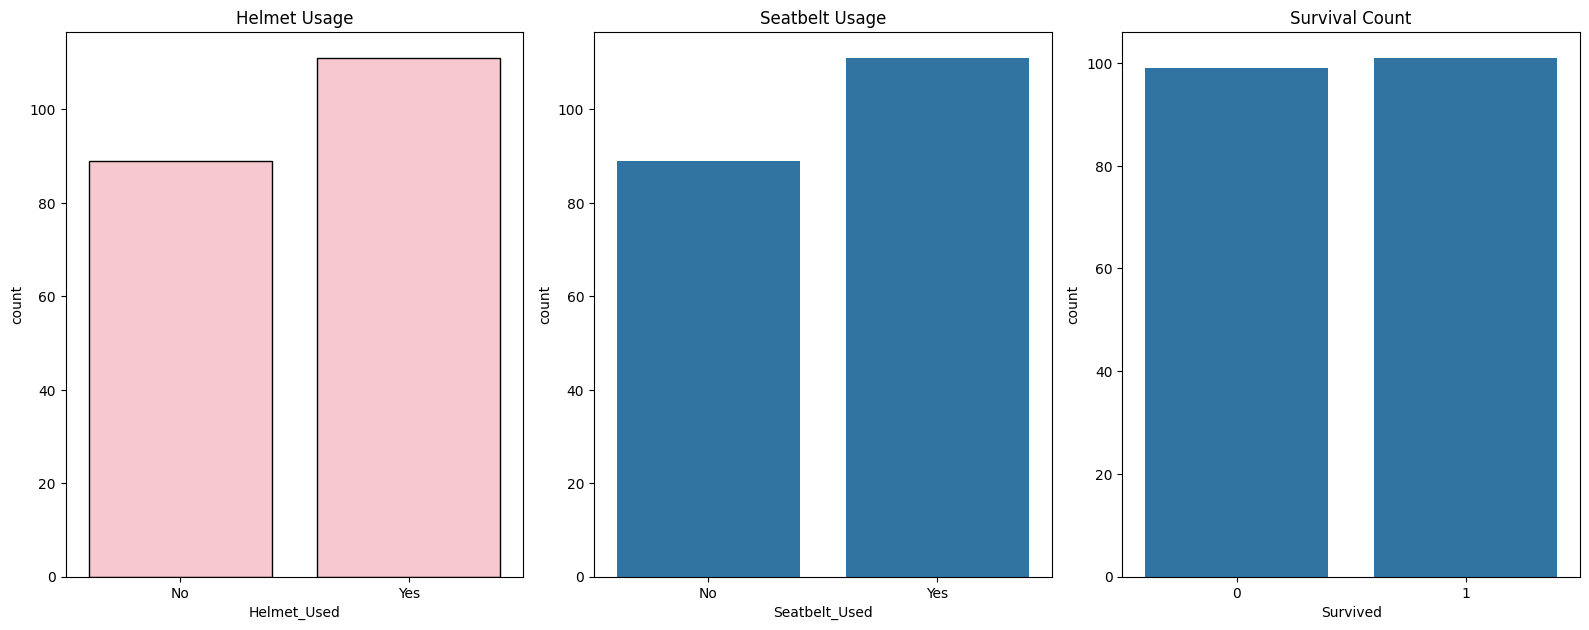

In [ ]:
# Create visualizations of key variables
plt.figure(figsize=(16, 12))

# Helmet Usage
plt.subplot(2, 3, 1)
sns.countplot(x='Helmet_Used', data=df, color='pink', edgecolor='black')
plt.title('Helmet Usage')

# Seatbelt Usage
plt.subplot(2, 3, 2)
sns.countplot(x='Seatbelt_Used', data=df)
plt.title('Seatbelt Usage')

# Survival Count
plt.subplot(2, 3, 3)
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')

plt.tight_layout()
plt.show()


## ***⚡Pairplot show***

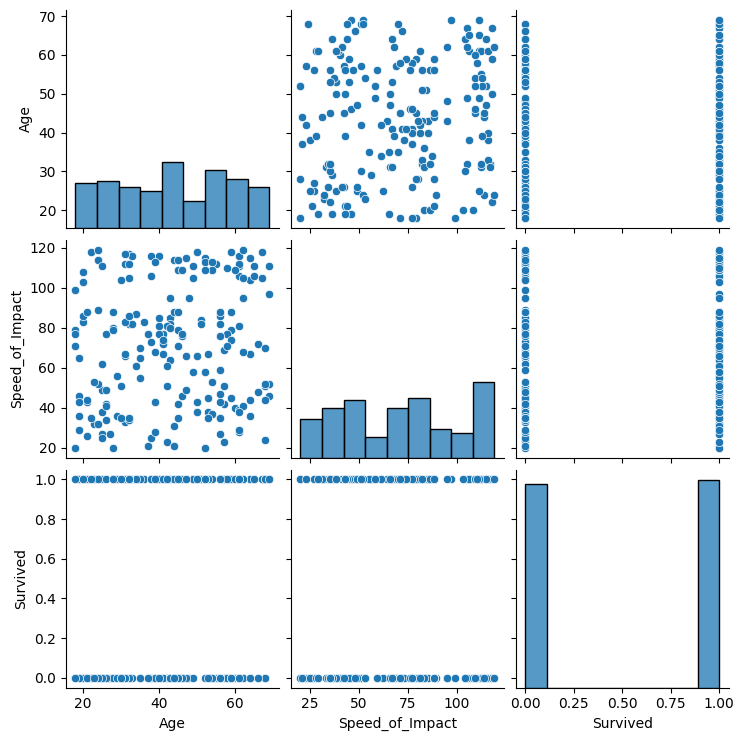

In [ ]:
sns.pairplot(df)

## ***⚡Bar chart show***

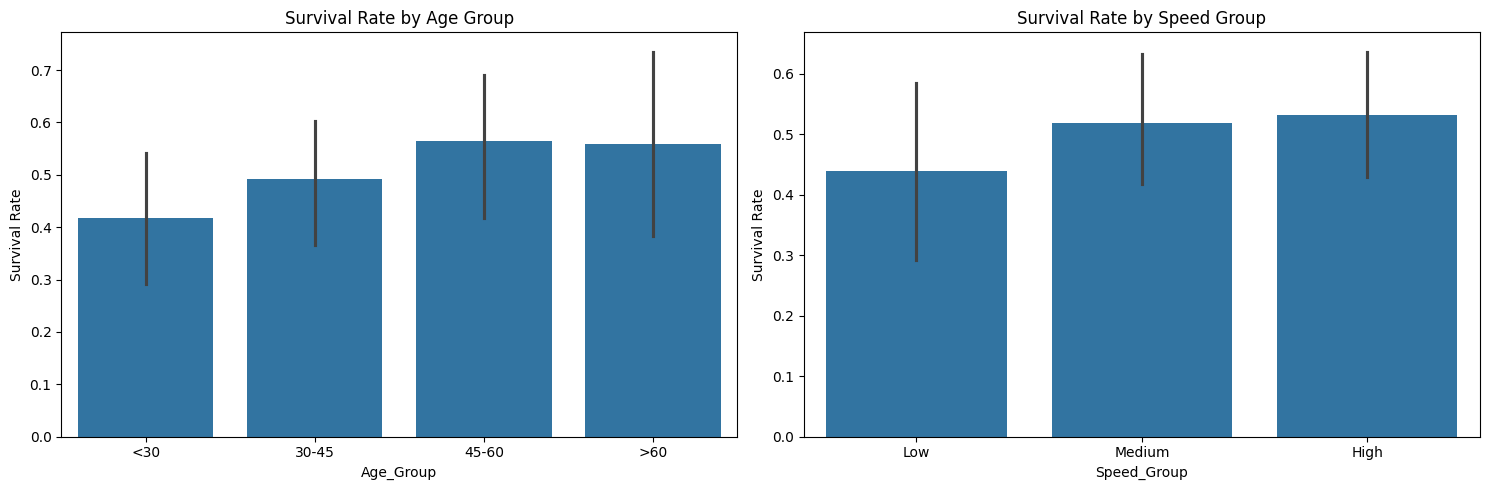

In [ ]:
# Create age groups and speed groups for better analysis
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 45, 60, 100], labels=['<30', '30-45', '45-60', '>60'])
df['Speed_Group'] = pd.cut(df['Speed_of_Impact'], bins=[0, 40, 80, 120], labels=['Low', 'Medium', 'High'])

# Create visualizations of relationships with survival
plt.figure(figsize=(15, 5))

# Survival rate by age group
plt.subplot(1, 2, 1)
sns.barplot(x='Age_Group', y='Survived', data=df, estimator=np.mean)
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')

# Survival rate by speed group
plt.subplot(1, 2, 2)
sns.barplot(x='Speed_Group', y='Survived', data=df, estimator=np.mean)
plt.title('Survival Rate by Speed Group')
plt.ylabel('Survival Rate')

plt.tight_layout()
plt.show()


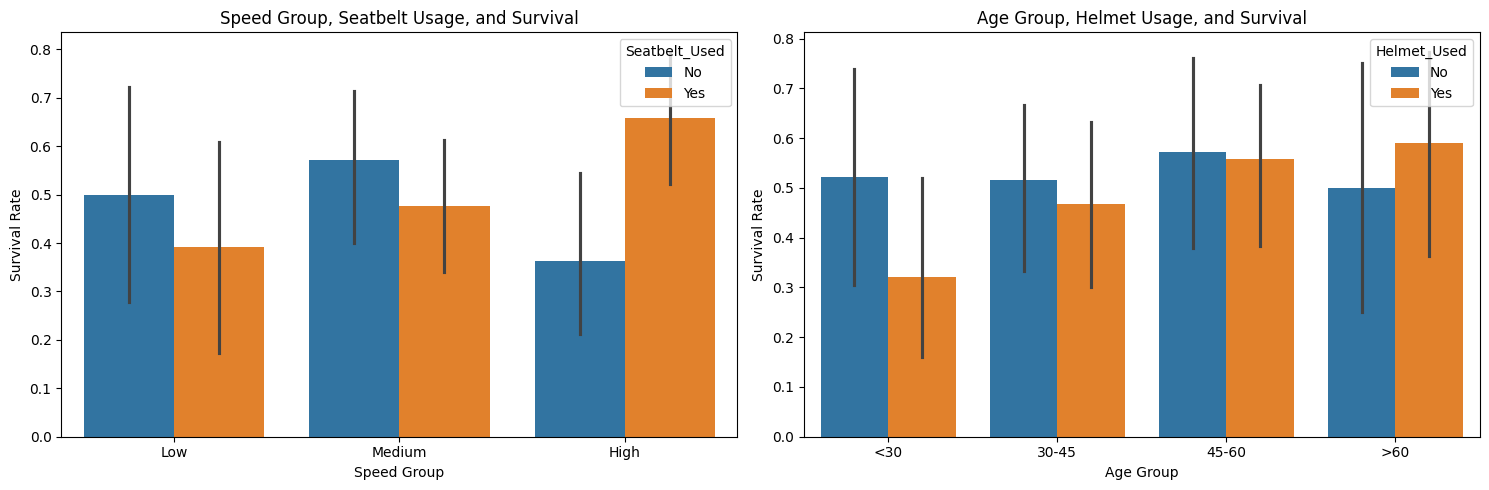

In [ ]:
# Explore safety equipment effectiveness
plt.figure(figsize=(15, 5))

# Interaction between Speed Group, Seatbelt Usage, and Survival
plt.subplot(1, 2, 1)
sns.barplot(x='Speed_Group', y='Survived', hue='Seatbelt_Used', data=df)
plt.title('Speed Group, Seatbelt Usage, and Survival')
plt.xlabel('Speed Group')
plt.ylabel('Survival Rate')

# Interaction between Age Group, Helmet Usage, and Survival
plt.subplot(1, 2, 2)
sns.barplot(x='Age_Group', y='Survived', hue='Helmet_Used', data=df)
plt.title('Age Group, Helmet Usage, and Survival')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')

plt.tight_layout()
plt.show()

# FEATURE Engineering

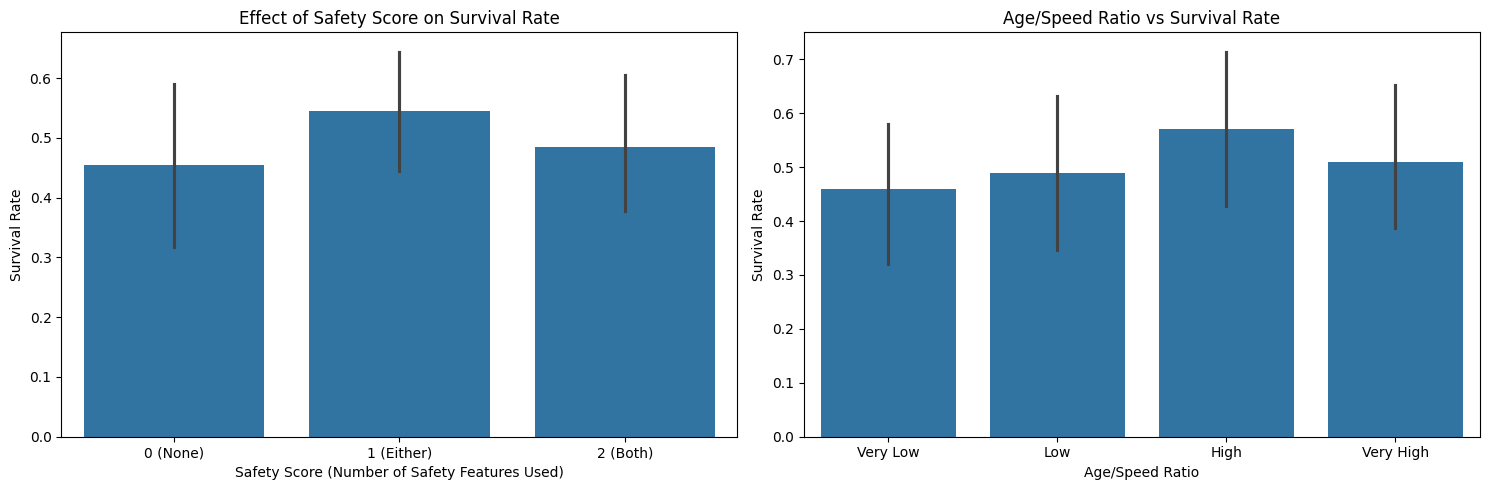

In [ ]:
# Create new interaction features
# Combine Age and Speed
df['Age_Speed_Ratio'] = df['Age'] / df['Speed_of_Impact']

# Create safety score (0, 1, or 2 safety features used)
df['Safety_Score'] = (df['Helmet_Used'] == 'Yes').astype(int) + (df['Seatbelt_Used'] == 'Yes').astype(int)

# Let's visualize the effect of these new features
plt.figure(figsize=(15, 5))

# Effect of safety score on survival
plt.subplot(1, 2, 1)
sns.barplot(x='Safety_Score', y='Survived', data=df)
plt.title('Effect of Safety Score on Survival Rate')
plt.xlabel('Safety Score (Number of Safety Features Used)')
plt.ylabel('Survival Rate')
plt.xticks([0, 1, 2], ['0 (None)', '1 (Either)', '2 (Both)'])

# Relationship between Age/Speed Ratio and Survival

plt.subplot(1, 2, 2)

# Create the 'Age_Speed_Ratio' column if it doesn't exist
# Assuming you want to calculate it as Age divided by Speed of Impact
if 'Age_Speed_Ratio' not in df.columns:
    df['Age_Speed_Ratio'] = df['Age'] / df['Speed_of_Impact']

# Create bins for the Age/Speed Ratio
df['Age_Speed_Ratio_Bin'] = pd.qcut(df['Age_Speed_Ratio'], 4, labels=['Very Low', 'Low', 'High', 'Very High'])
sns.barplot(x='Age_Speed_Ratio_Bin', y='Survived', data=df)
plt.title('Age/Speed Ratio vs Survival Rate')
plt.xlabel('Age/Speed Ratio')
plt.ylabel('Survival Rate')

plt.tight_layout()
plt.show()

## predictive modeling

In [ ]:
# Prepare data for modeling
# One-hot encode categorical variables
df_model = pd.get_dummies(df, columns=['Gender', 'Helmet_Used', 'Seatbelt_Used'], drop_first=True)

# Define features and target
X = df_model[['Age', 'Speed_of_Impact', 'Gender_Male', 'Helmet_Used_Yes',
              'Seatbelt_Used_Yes', 'Age_Speed_Ratio', 'Safety_Score']]
y = df_model['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
imputer = SimpleImputer(strategy='mean')  # 'median', 'most_frequent'

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

Logistic Regression - Accuracy: 0.6167, AUC: 0.6218
Random Forest - Accuracy: 0.4333, AUC: 0.4551
Gradient Boosting - Accuracy: 0.5000, AUC: 0.5527
XGBoost - Accuracy: 0.4833, AUC: 0.5662


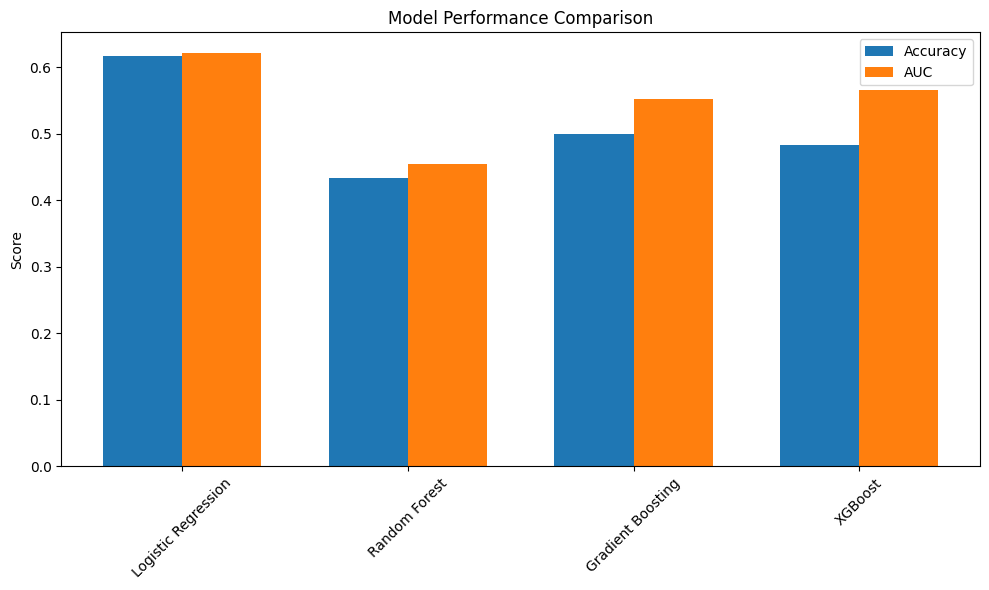

In [ ]:
from sklearn.impute import SimpleImputer
# Build multiple models for comparison
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBoost.XGBClassifier(random_state=42)
}

# Fit all models and collect results
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy and AUC
    accuracy = accuracy_score(y_test, y_pred)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)

    # Store results
    results[name] = {
        'accuracy': accuracy,
        'auc': auc,
        'model': model
    }

    print(f"{name} - Accuracy: {accuracy:.4f}, AUC: {auc:.4f}")

# Visualize model performance
plt.figure(figsize=(10, 6))
accuracies = [results[name]['accuracy'] for name in models.keys()]
aucs = [results[name]['auc'] for name in models.keys()]

x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, accuracies, width, label='Accuracy')
plt.bar(x + width/2, aucs, width, label='AUC')
plt.xticks(x, models.keys(), rotation=45)
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.tight_layout()
plt.show()

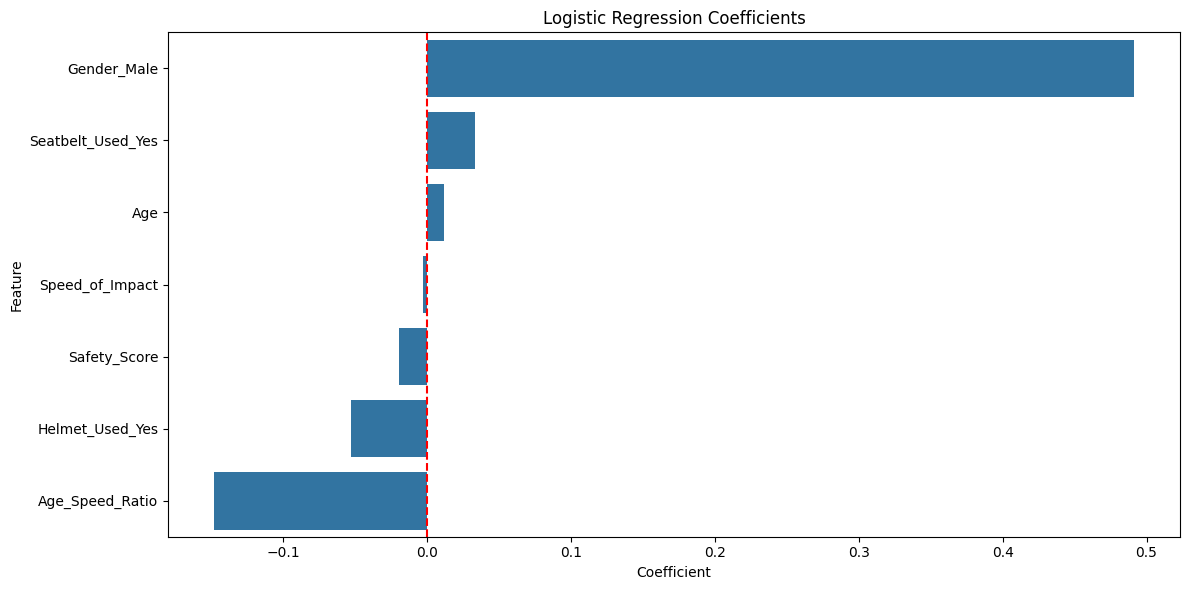

Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation AUC: 0.5322


LogisticRegression(C=10, random_state=42, solver='liblinear')

In [ ]:
# Examine the coefficients of our best model (Logistic Regression)
best_model = results['Logistic Regression']['model']
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': best_model.coef_[0]
})
coefficients = coefficients.sort_values('Coefficient', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Logistic Regression Coefficients')
plt.axvline(x=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

# Hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(
    LogisticRegression(random_state=42),
    {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear'],
        'penalty': ['l1', 'l2']
    },
    cv=5,
    scoring='roc_auc'
)
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
grid_search.fit(X, y)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation AUC: {grid_search.best_score_:.4f}")

# Final model
final_model = LogisticRegression(**grid_search.best_params_, random_state=42)
final_model.fit(X, y)

In [ ]:
# Create a function to predict survival probability
def predict_survival(age, gender, speed, helmet, seatbelt):
    """
    Predicts the probability of survival in a road accident.

    Parameters:
    age (int): Age of the person
    gender (str): 'Male' or 'Female'
    speed (float): Speed of impact
    helmet (str): 'Yes' or 'No' if helmet was used
    seatbelt (str): 'Yes' or 'No' if seatbelt was used

    Returns:
    float: Probability of survival (0-1)
    """
    # Convert inputs to model features
    gender_male = 1 if gender == 'Male' else 0
    helmet_yes = 1 if helmet == 'Yes' else 0
    seatbelt_yes = 1 if seatbelt == 'Yes' else 0

    # Calculate derived features
    age_speed_ratio = age / speed if speed > 0 else 0
    safety_score = helmet_yes + seatbelt_yes

    # Create feature vector
    features = np.array([[age, speed, gender_male, helmet_yes, seatbelt_yes,
                          age_speed_ratio, safety_score]])

    # Predict probability
    return final_model.predict_proba(features)[0][1]

# Visualize survival probabilities across different scenarios
ages = range(20, 70, 10)
speeds = range(20, 120, 20)

# For Males with both safety measures
male_both_probs = np.zeros((len(ages), len(speeds)))
for i, age in enumerate(ages):
    for j, speed in enumerate(speeds):
        male_both_probs[i, j] = predict_survival(age, 'Male', speed, 'Yes', 'Yes')

# For Females with both safety measures
female_both_probs = np.zeros((len(ages), len(speeds)))
for i, age in enumerate(ages):
    for j, speed in enumerate(speeds):
        female_both_probs[i, j] = predict_survival(age, 'Female', speed, 'Yes', 'Yes')

# Plot heatmaps
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Male heatmap
sns.heatmap(male_both_probs, annot=True, fmt=".2f", cmap="YlGnBu",
            xticklabels=speeds, yticklabels=ages, ax=axes[0])
axes[0].set_title('Survival Probability: Males with Helmet & Seatbelt')
axes[0].set_xlabel('Speed of Impact (km/h)')
axes[0].set_ylabel('Age')

# Female heatmap
sns.heatmap(female_both_probs, annot=True, fmt=".2f", cmap="YlGnBu",
            xticklabels=speeds, yticklabels=ages, ax=axes[1])
axes[1].set_title('Survival Probability: Females with Helmet & Seatbelt')
axes[1].set_xlabel('Speed of Impact (km/h)')
axes[1].set_ylabel('Age')

plt.tight_layout()
plt.show()

sns.heatmap(male_both_probs, annot=True


SyntaxError: incomplete input (<ipython-input-96-3faee412e1d1>, line 68)